In [20]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from tqdm import tqdm # loop vizualization

In [2]:
x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y_or = torch.tensor([[0], [1], [1], [1]], dtype=torch.float32) # OR
y_xor = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32) # XOR

In [3]:
class model_OR(nn.Module):
    def __init__(self):
        super(model_OR, self).__init__()
        self.fc1 = nn.Linear(2, 1)

    def forward(self, x):
        # Преобразуем входной тензор в одномерный вектор
        x = F.sigmoid(self.fc1(x))
        return x

In [4]:
model_or = model_OR()
optimizer = Adam(params=model_or.parameters(), lr=1e-3)
loss_func = nn.BCELoss()

In [5]:
losses = []
for epoch in tqdm(range(5000)):
    outputs = model_or(x)
    loss = loss_func(outputs, y_or)
    loss.backward()
    losses.append(loss.item())
    optimizer.step()
    optimizer.zero_grad()

100%|██████████| 5000/5000 [00:01<00:00, 3171.06it/s]


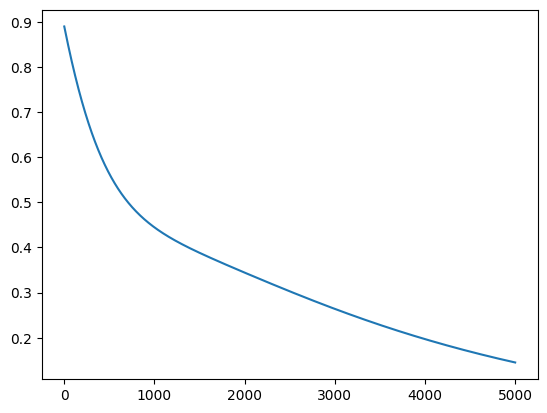

In [6]:
plt.plot(losses)

In [7]:
print("OR")
print("x\ty\toutput")
for i in range(4):
    print(f"{x[i].detach().numpy()}\t{y_or[i].detach().numpy()}\t{round(model_or(x[i]).item())}")

OR
x	y	output
[0. 0.]	[0.]	0
[0. 1.]	[1.]	1
[1. 0.]	[1.]	1
[1. 1.]	[1.]	1


In [8]:
class model_XOR1(nn.Module):
    def __init__(self):
        super(model_XOR1, self).__init__()
        self.fc1 = nn.Linear(2, 1)

    def forward(self, x):
        # Преобразуем входной тензор в одномерный вектор
        x = F.sigmoid(self.fc1(x))
        return x

In [9]:
model_xor1 = model_XOR1()
optimizer_xor1 = Adam(params=model_xor1.parameters(), lr=1e-3)
loss_func = nn.BCELoss()

In [10]:
losses = []
for epoch in tqdm(range(5000)):
    outputs = model_xor1(x)
    loss = loss_func(outputs, y_xor)
    loss.backward()
    losses.append(loss.item())
    optimizer_xor1.step()
    optimizer_xor1.zero_grad()

100%|██████████| 5000/5000 [00:01<00:00, 3194.78it/s]


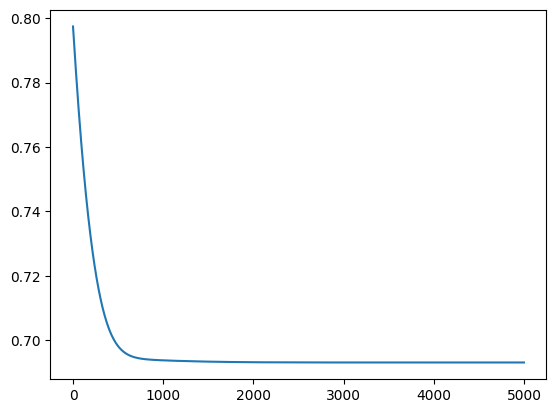

In [11]:
plt.plot(losses)

In [12]:
print("XOR")
print("x\ty\toutput")
for i in range(4):
    print(f"{x[i].detach().numpy()}\t{y_xor[i].detach().numpy()}\t{round(model_xor1(x[i]).item())}")

XOR
x	y	output
[0. 0.]	[0.]	1
[0. 1.]	[1.]	1
[1. 0.]	[1.]	1
[1. 1.]	[0.]	0


In [13]:
class model_XOR2(nn.Module):
    def __init__(self):
        super(model_XOR2, self).__init__()
        self.fc1 = nn.Linear(2, 2)
        self.fc2 = nn.Linear(2, 1)

    def forward(self, x):
        # Преобразуем входной тензор в одномерный вектор
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        return x

In [14]:
model_xor2 = model_XOR2()
optimizer_xor2 = Adam(params=model_xor2.parameters(), lr=1e-3)
loss_func = nn.BCELoss()

In [15]:
losses = []
for epoch in tqdm(range(5000)):
    outputs = model_xor2(x)
    loss = loss_func(outputs, y_xor)
    loss.backward()
    losses.append(loss.item())
    optimizer_xor2.step()
    optimizer_xor2.zero_grad()

100%|██████████| 5000/5000 [00:02<00:00, 2386.07it/s]


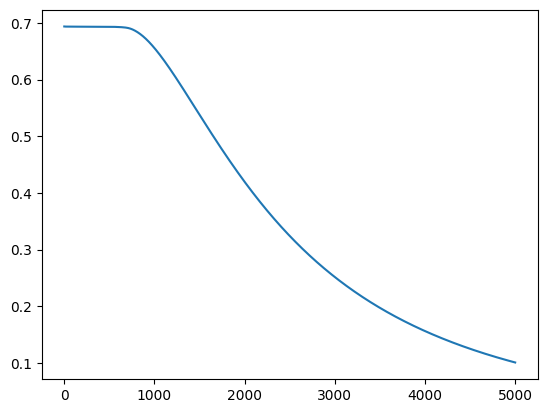

In [16]:
plt.plot(losses)

In [17]:
print("XOR")
print("x\ty\toutput")
for i in range(4):
    print(f"{x[i].detach().numpy()}\t{y_xor[i].detach().numpy()}\t{round(model_xor2(x[i]).item())}")

XOR
x	y	output
[0. 0.]	[0.]	0
[0. 1.]	[1.]	1
[1. 0.]	[1.]	1
[1. 1.]	[0.]	0


In [18]:
def sigmoid(input):
  return 1 / (1 + np.exp(-input))

def tanh(input):
  return (np.exp(2*input) - 1) / (np.exp(2*input) + 1)

def relu(input):
  return (max(0, input))

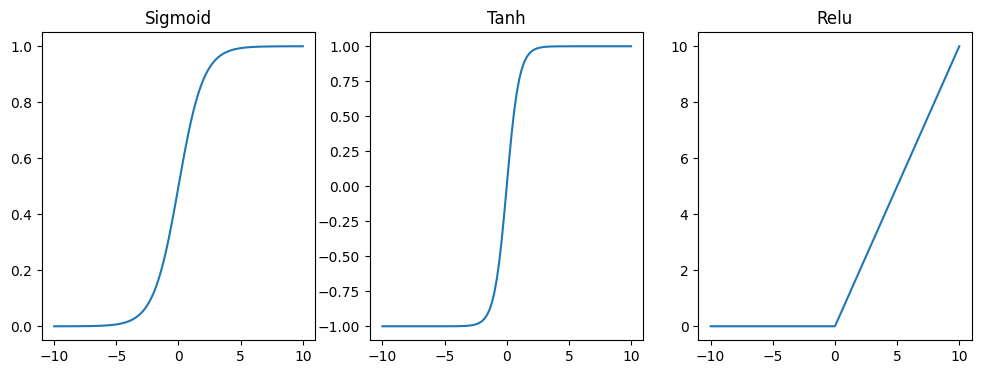

In [19]:
act_x = np.linspace(-10, 10, 101)
sigmoid_y = [sigmoid(x) for x in act_x]
tanh_y = [tanh(x) for x in act_x]
relu_y = [relu(x) for x in act_x]

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(act_x, sigmoid_y)
plt.title("Sigmoid")

plt.subplot(1, 3, 2)
plt.plot(act_x, tanh_y)
plt.title("Tanh")

plt.subplot(1, 3, 3)
plt.plot(act_x, relu_y)
plt.title("Relu")
plt.show()